Hello and welcome to the MIS 670 tutorial on interfacing python with Reddit.com.  In this tutuorial, you will learn about the Reddit platform, how to access using Python and how to extract data from it.

For this tutorial, I plan to how to create a reddit application, connect to the Subreddit 'Gadgets'; collect and parse its submission titles and comments.  We'll also use sentiment analysis to understand whether a submitted gadget is popular or unpopular using techniques we've learned earlier in this class.

## Overview of Reddit.com

Reddit.com is a social media website where users submit weblinks catered to certain subjects, called subreddits.  Other users then review the submission and vote up (positive) or down (negative) providing a score.  If the score is determined to be high enough, it will move to the main page of the subreddit where more users will see it and then vote on it.  Users can also comment on the submissions and those comments themselves can then be voted on and move up and down in the discussion.  The most popular comments will be at the top and the least popular at the bottom.  Users can also comment on comments and the process continues.

Reddit has many subreddits.  Some of the more popular are: Funny, which is usually links to picture or videos of funny things, News which is geared around News in US, AskReddit where users submit questions for other users to answer and TodayIlearned where users submit something shocking they learned today.  There are thousands of subreddits from the more popular to the highly specific such as /r/amazon where people only discuss things related to Amazon.com.  There’s even a K-State one /r/kstate and one geared towards finding datasets for doing analysis on, /r/datasets.  Each subreddit has its own submission and behavior rules which are supervised by a team of volunteer moderators.

Users will generally subscribe to subreddits they are interested in and can then be presented daily with a wall a new content only related to subjects the are interest in.  From a business perspective this is interesting because, you could use the data presented here to test new ideas, get feedback from anonymous users and even determine upcoming trends.

<b>Warning:  Please be aware that this is social media and is not edited before consumption.  Anonymous posting on the internet  is a real life wild west and people's opinions are their own and could be vulgar and/or offensive.</b>


In [10]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/watch?time_continue=4&v=tlI022aUWQQ;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


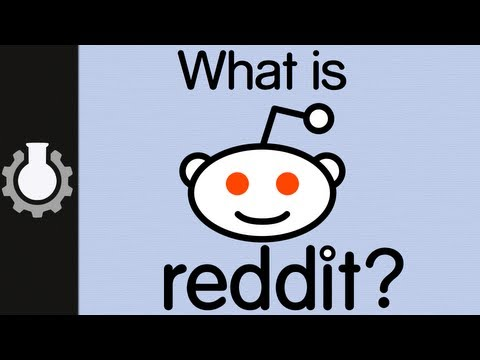

In [1]:
from IPython.display import YouTubeVideo
from IPython.display import Image, display
YouTubeVideo('tlI022aUWQQ')

## Create a Reddit Account

Before we can connect to Reddit, we need to setup a (free) account and create an application inside our acccount.

Step 1.  Create a Reddit account.
  * Goto https://www.reddit.com
  * Sign up for an account
  * Goto the prefrences section and click on the apps tab
 

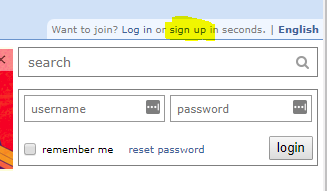

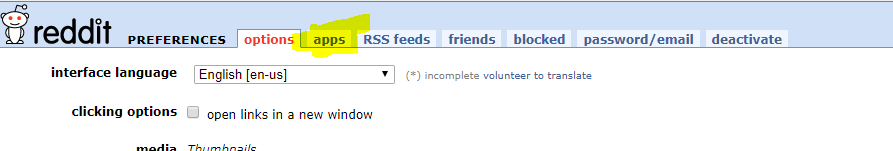

In [8]:
from IPython.display import Image, display
display(Image(filename='pictures/signup.png', embed=True))
display(Image(filename='pictures/apps_tab.png', embed=True))

## Now lets create an app
  * Click the "Are you a developer, create and app" button
   * First give it a name
   * Choose the script application checkbox
   * enter description if you'd like
   * skip about url
   * enter http://localhost:8080 as the redirect uri.
   * click create app button.
Take note of the "client id" and secret, you'll need them when setting up the connection.


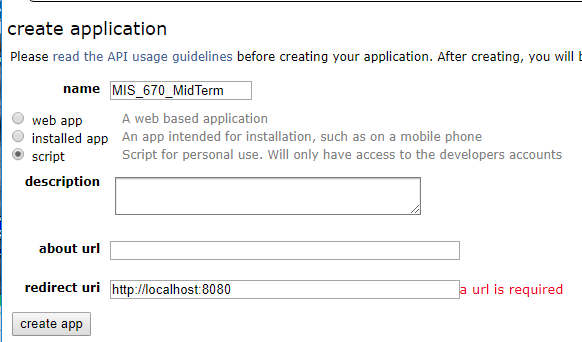

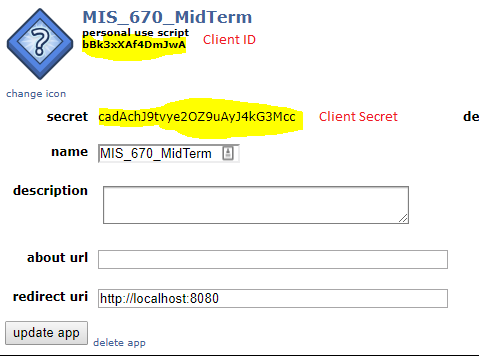

In [6]:
from IPython.display import Image, display
display(Image(filename='pictures/create_app.png', embed=True))
display(Image(filename='pictures/app_details.png', embed=True))

## Use of PRAW

In this tutorial we'll be using PRAW (The Python Reddit API Wrapper) to connect and extract data from Reddit. 

PRAW Documentation
https://praw.readthedocs.io/en/latest/

First thing for PRAW is we need to install it

In [2]:
#install PRAW
#!pip install praw

Now we need to authenticate ourselves to Reddit using the information we just got from creating our account and app.

In [3]:
import praw
reddit = praw.Reddit(client_id='d4uZfqeWuDCR3w', #FROM THE APP WE CREATED
                     client_secret='FEtzcSg468WMQ0b9x78ClJzk6i0', #FROM THE APP WE CREATED
                     password='PASSWORD', #USER ACCOUNT PASSWORD
                     user_agent='testscript by /u/andse670',#UNIQUE IDENTIFIER, CAN BE ANYTHING
                     username='USERNAME') # REDDIT USERNAME

If you get an 'OAuthException: invalid_grant error processing request' one of the fields above is incorrect.

In [4]:
#test you authenticated OK by asking it ot print your username
print (reddit.user.me())

andse670


## Please be aware that Reddit has rate limits, you are limited to no more that 60 requests per minute.    Please see the API rules of Reddit for details: https://github.com/reddit-archive/reddit/wiki/API


In [5]:
#lets do an inital test, lets query the subreddit "all" for the 25 current "hot" submissions and print their titles
for submission in reddit.subreddit('all').hot(limit=25):
    print(submission.title)

New Silicon Valley intro throws shade at Facebook
MRW I'm on Reddit and I see an old and tired repost with thousands of upvotes and gold
Press briefing starts off with a bang, as reporter asks why the American people should trust anything the White House says
[Bodner] Markelle Fultz Will Play tonight
Fantastic Mr Fox snatches wallet
TIL there’s a type of honey called "mad honey," which causes hallucinations. Honey hunters in Nepal make dangerous vertical climbs to harvest it since it sells for $60-80 a pound
Facebook has lost $100 billion in 10 days — and now advertisers are pulling out
Dad, get the ball plz !
[Image] Focus on what really matters to you
r/BikiniBottomTwitter arriving with reinforcements in the Great War, colorized. (2018)
But.. is fish. [OC]
This is where the real fun begins
An Iranian teacher visits his cancer-stricken student every day to catch him up on what he missed at school.
Wow you so beautiful. Wow message didn't send separately. Wow leave group.
Swinging Lamp

Because the documentation of PRAW is lacking a bit, an easy way to get help, is to use pprint. pprint uses a "pretty" print structure to printout the properties of an object so its easy to see what they have.

In [6]:
import pprint
pprint.pprint(vars(submission))

{'_comments_by_id': {},
 '_fetched': False,
 '_flair': None,
 '_info_params': {},
 '_mod': None,
 '_reddit': <praw.reddit.Reddit object at 0x00000000092EFE80>,
 'approved_at_utc': None,
 'approved_by': None,
 'archived': False,
 'author': Redditor(name='Zootpak'),
 'author_flair_css_class': None,
 'author_flair_text': None,
 'banned_at_utc': None,
 'banned_by': None,
 'brand_safe': True,
 'can_gild': True,
 'can_mod_post': False,
 'clicked': False,
 'comment_limit': 2048,
 'comment_sort': 'best',
 'contest_mode': False,
 'created': 1522132409.0,
 'created_utc': 1522103609.0,
 'distinguished': None,
 'domain': u'i.redd.it',
 'downs': 0,
 'edited': False,
 'gilded': 0,
 'hidden': False,
 'hide_score': False,
 'id': u'87dd35',
 'is_crosspostable': True,
 'is_reddit_media_domain': True,
 'is_self': False,
 'is_video': False,
 'likes': None,
 'link_flair_css_class': None,
 'link_flair_text': None,
 'locked': False,
 'media': None,
 'media_embed': {},
 'mod_note': None,
 'mod_reason_by': Non

Some interesting attributes
* ups: The number of upvotes
* downs: The number of downvotes
* score: The aggregate of ups and downs
* num_comments: The number of comments
* title: The name of the submission

On Reddit, users vote for things, the "Upvote" or +1 something they like and "Downvote" or -1 something they dont like.  This is true for both submissions and comments.  In PRAW, this is called a Score and is an aggregate of up/down votes, its viewed from the <b>score</b> attribute of either the comment or submission.

In [7]:
#lets check the scores of the submissions
for submission in reddit.subreddit('all').hot(limit=25):
    print"Score: " + str(submission.score)
    print"Title: " + str(submission.title.encode('utf-8')) #some titles have characters that need to be converted to UTF-8 for Python Print

Score: 15618
Title: New Silicon Valley intro throws shade at Facebook
Score: 17159
Title: MRW I'm on Reddit and I see an old and tired repost with thousands of upvotes and gold
Score: 41493
Title: Press briefing starts off with a bang, as reporter asks why the American people should trust anything the White House says
Score: 7040
Title: [Bodner] Markelle Fultz Will Play tonight
Score: 13355
Title: Fantastic Mr Fox snatches wallet
Score: 27871
Title: TIL there’s a type of honey called "mad honey," which causes hallucinations. Honey hunters in Nepal make dangerous vertical climbs to harvest it since it sells for $60-80 a pound
Score: 73149
Title: Facebook has lost $100 billion in 10 days — and now advertisers are pulling out
Score: 55639
Title: Dad, get the ball plz !
Score: 18348
Title: [Image] Focus on what really matters to you
Score: 9582
Title: r/BikiniBottomTwitter arriving with reinforcements in the Great War, colorized. (2018)
Score: 9277
Title: But.. is fish. [OC]
Score: 25998
T

In [8]:
#lets see how many comments each title has.  More comments could mean a submission is controversial.
for submission in reddit.subreddit('all').hot(limit=25):
    print"Number of Comments: " + str(submission.num_comments)
    print"Title: " + str(submission.title.encode('utf-8'))

Number of Comments: 445
Title: New Silicon Valley intro throws shade at Facebook
Number of Comments: 383
Title: MRW I'm on Reddit and I see an old and tired repost with thousands of upvotes and gold
Number of Comments: 2491
Title: Press briefing starts off with a bang, as reporter asks why the American people should trust anything the White House says
Number of Comments: 1022
Title: [Bodner] Markelle Fultz Will Play tonight
Number of Comments: 449
Title: Fantastic Mr Fox snatches wallet
Number of Comments: 930
Title: TIL there’s a type of honey called "mad honey," which causes hallucinations. Honey hunters in Nepal make dangerous vertical climbs to harvest it since it sells for $60-80 a pound
Number of Comments: 4678
Title: Facebook has lost $100 billion in 10 days — and now advertisers are pulling out
Number of Comments: 484
Title: Dad, get the ball plz !
Number of Comments: 269
Title: [Image] Focus on what really matters to you
Number of Comments: 106
Title: r/BikiniBottomTwitter arr

In [9]:
#now lets combine the two to get a better picture of the popularity of the the submissions
for submission in reddit.subreddit('all').hot(limit=25):
    print"Score: " + str(submission.score)
    print"Number of Comments: " + str(submission.num_comments)
    print"Title: " + str(submission.title.encode('utf-8'))

Score: 15635
Number of Comments: 446
Title: New Silicon Valley intro throws shade at Facebook
Score: 17177
Number of Comments: 383
Title: MRW I'm on Reddit and I see an old and tired repost with thousands of upvotes and gold
Score: 41484
Number of Comments: 2492
Title: Press briefing starts off with a bang, as reporter asks why the American people should trust anything the White House says
Score: 7038
Number of Comments: 1021
Title: [Bodner] Markelle Fultz Will Play tonight
Score: 13308
Number of Comments: 447
Title: Fantastic Mr Fox snatches wallet
Score: 27814
Number of Comments: 930
Title: TIL there’s a type of honey called "mad honey," which causes hallucinations. Honey hunters in Nepal make dangerous vertical climbs to harvest it since it sells for $60-80 a pound
Score: 73135
Number of Comments: 4680
Title: Facebook has lost $100 billion in 10 days — and now advertisers are pulling out
Score: 55617
Number of Comments: 484
Title: Dad, get the ball plz !
Score: 18366
Number of Comme

#### Most submissions are to a particular subtopic, called a "Subreddit".  Some of the more popular subreddits are funny, pics, news, gaming and movies.

#### We're going to look at 5 different gadgets based on pouplarity over the last month.  Not every topic submitted to the subreddit is exactly a stand alone gadget like we're looking for in our analysis.  I looked at the web page a decided that we were going to usethe top 7 but skip the first 2.

#### This is the URL we're going to use PRAW to parse using the API.
https://www.reddit.com/r/gadgets/top/?sort=top&t=month


In [10]:
#lets looks at the top level comments for the top 5 submissions in the "gadgets" subreddit 
#but because of an executive decision we're going to skip the first two so we'll set the retrival limit to 7 
# and ignore the first two using the index counter
index =1 

for submission in reddit.subreddit('gadgets').top(time_filter='month',limit=7):
    if index > 2:
        #skip subreddit announcement topics
        if submission.stickied == False:
            print(submission.title)
            #sort the comments by highest score
            submission.comment_sort = 'top'
            #print the score of the first 20 top level comments and then the text of the comment
            for comment in submission.comments[:20]:
                #we're only interested in comments with a score above 1
                if comment.score > 1:
                    print(comment.score)
                    print(comment.body)
        #separation
        print "-------------------------------------------------------------------------------------------------"
    index +=1

The Army is eyeing a personal hoverboard that can reach 10,000 feet
8395
what could possibly go wrong? Some green person that looks like a goblin wouldnt fly around throwing bombs at people
1775
Should make those Army v Navy games a little more interesting
1686
Damn. If it takes 40 hours of instruction to get licensed on a standard army vehicle I can't imagine how long it'll take for that
784
12-year army vet here.

Everyone gon die if they issue this.
592
What the hell is it's power source and prime mover though? I'd imagine that once you're two miles up, you don't have much left in a craft that small for covering distance and landing, but clearly someone sees potential.
275
[deleted]
240
What's the total runtime?  more than 6 minutes?

Typical business insider clickbait trash. 
135
I’ve been waiting for a hover board since I saw back to the future fur the first time.
107
Hello a year ago, how are you?
94
Glad my tax dollars are buying the real important things like rad as fuck hover 

3381
And [this $25 USB device](https://www.amazon.com/Mayflash-Nintendo-Magic-NS-Wireless-Controller-Windows/dp/B07413R4HS/ref=cm_cr_arp_d_product_top?ie=UTF8) has been available for several months and connects PS4, PS3, Xbox One, fight sticks, and standard wired USB controllers to the Switch....
678
How about a GameCube controller for my ps4?
226
This is it !
139
[MayFlash Magic-NS](http://www.mayflash.com/Products/NINTENDOWiiU/MAGIC-NS.html)

Works with PS4 controllers as well as Wii-U Pro controllers. 
36
Did anybody else notice how small and skinny the hand model is in that first picture 
42
Nice! I actually slightly prefer the Switch Pro controller, so I almost wish I could do it the other way around – but this is a nice/easy way of getting more controllers onto your Switch if you already have a PS4.
28
Don't mind me I'm just commenting so I can remember this later.
24
xbox one controller?
23
Now I'm assuming the analog triggers will work as intended, right? After I read where the

In [11]:
#lets put it into a dataframe
import pandas as pd

pd_data = []
commentdata = []
index =1

for submission in reddit.subreddit('gadgets').top(time_filter='month',limit=7):
    if index >2:
        #skip subreddit announcement topics
        if submission.stickied == False:
            #sort the comments by highest score
            submission.comment_sort = 'top'
            #print the score of the first 15 top level comments and then the text of the comment
            for comment in submission.comments[0:20]:
                #we're only interested in comments with a score above 1 and whose text are not 'deleted"
                if comment.score > 1:
                    combinedlist = [submission.title,comment.score,comment.body]
                    commentdata.append(combinedlist)

    index +=1

    
#convert to pandas
pd_data = pd.DataFrame(commentdata)

#name the columns
pd_data = pd_data.rename(columns={0: 'Title', 1:'Comments_Score', 2:'Comment_Text'})

#save the data to csv file
pd_data.to_csv("data/reddit_gadget_comments.csv", encoding="utf-8")


#### Now we have comment data on 5 different gadgets.  For our business case, we are interested in gathering sentiment analysis data on the comments of those products.

## Sentiment Analysis

For our sentiment analysis of the comments we are going to use Microsoft Azure Cognitive Services.  Please note, Azure cognitive services is a paid service but has a free tier which allows for up to 5000 queries per month. Because the size of the comments can vary from a single word to several paragraphs, we're going to do sentence level analysis.

Azure sentiment analysis will reurn a decimal score between 0 and 1, with 0 being more negative and 1 being more positive

Setup Azure using the following setups:
    1. Create a free Azure account at portal.azure.com and login
    2. Create a cognitive services resource by clicking Create Resource and choosing Cognitive Services
    3. Add a Text API Service and click Create.  Complete the details to add the serivce.
    4. Enter the newly created serivce and click on the overview tab, take note of the Endpoint URL.
    4. Click on the Keys Tab, take note of Key1.
   

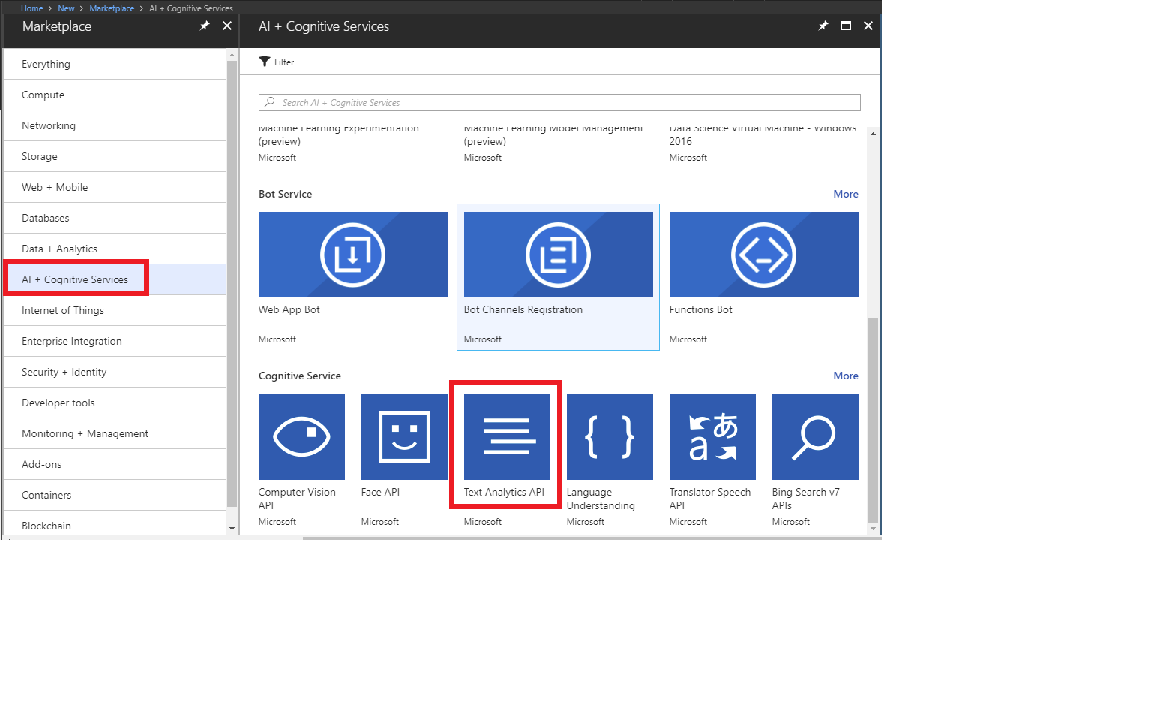

In [7]:
from IPython.display import Image, display
display(Image(filename='pictures/Azure_Text_Analytics_Create1.png', embed=True))

#### In my case I created my serivce in the south central region so my Enpoint URL and key1 are:
https://southcentralus.api.cognitive.microsoft.com/text/analytics/v2.0/
   Key: 8a1e014f4e9540b8b1aae062a1bb824e
   
These are some helpful links if you need additional information:
* https://hub.mybinder.org/user/microsoft-cogni-vices-notebooks-r67vm5tb/notebooks/TextAnalytics.ipynb
* https://docs.microsoft.com/en-us/azure/cognitive-services/text-analytics/quickstarts/python   

Now that we have our Azure text analytics endpoint and access key, the first thing we need to do it put out data into a dictionary of this format for processing by azure.

Fields are : ID#, Language(en for english) and the text to be processed.

Example: <br />
documents = {'documents' : [
  {'id': '1', 'language': 'en', 'text': 'I had a wonderful experience! The rooms were wonderful and the staff was helpful.'},
  {'id': '2', 'language': 'en', 'text': 'I had a terrible time at the hotel. The staff was rude and the food was awful.'}}

In [21]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.tokenize.moses import MosesDetokenizer

#lets separate the topics into individual dataframe for submission to the sentiment analysis service.
listTopics = []

#get the unique titles of the dataset
listTopics= pd_data.Title.unique()

#stop words
stop_words = set(stopwords.words('english'))

#detoeknizer to put the sentence back together after removing stop words
detokenizer = MosesDetokenizer()

listDocument = []

#Remove usless words & stops words and add the row comments to a list that we can then add to the submissions dictionary
for index,row in pd_data.iterrows():
    #remove usless words
    cleaned_CommentText = re.sub("[^a-zA-Z]+", " ", row.Comment_Text )
    #tokenize
    word_tokens = word_tokenize(cleaned_CommentText.lower())
    #remove stop words
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    #detokenize
    detokenizen_sentence = detokenizer.detokenize(filtered_sentence, return_str=True)
    #some comments were reduced to nothing by the cleanising process, I replaced them with a 'blank' word
    if (len(detokenizen_sentence)) == 0:
        detokenizen_sentence = 'Blank'
    #append the comment to the list with the standard from Azure for english language
    listDocument.append({'id': str((index +1)), 'language': 'en', 'text': detokenizen_sentence})
    

#put them in the second correct dictionary for submission to Azure
az_documents = {'documents': listDocument}


In [22]:
az_documents

{'documents': [{'id': '1',
   'language': 'en',
   'text': u'could possibly go wrong green person looks like goblin wouldnt fly around throwing bombs people'},
  {'id': '2',
   'language': 'en',
   'text': u'make army v navy games little interesting'},
  {'id': '3',
   'language': 'en',
   'text': u'damn takes hours instruction get licensed standard army vehicle imagine long take'},
  {'id': '4',
   'language': 'en',
   'text': u'year army vet everyone gon die issue'},
  {'id': '5',
   'language': 'en',
   'text': u'hell power source prime mover though imagine two miles much left craft small covering distance landing clearly someone sees potential'},
  {'id': '6', 'language': 'en', 'text': u'deleted'},
  {'id': '7',
   'language': 'en',
   'text': u'total runtime minutes typical business insider clickbait trash'},
  {'id': '8',
   'language': 'en',
   'text': u'waiting hover board since saw back future fur first time'},
  {'id': '9', 'language': 'en', 'text': u'hello year ago'},
  {'id

### Azure returns a dictionary with the keys of id and score.

Example: <br />
{u'documents': [{u'id': u'1', u'score': 0.1941448450088501},
                {u'id': u'2', u'score': 0.02274000644683838},
                {u'id': u'3', u'score': 0.8178701400756836},
                {u'id': u'4', u'score': 0.06585055589675903},
                {u'id': u'5', u'score': 0.04939240217208862}],
 u'errors': []}

### Now we'll put that data back into a dataframe and do further analysis.

In [28]:
#Azure Submission
#This code is the from the Azure documentation
# https://docs.microsoft.com/en-us/azure/cognitive-services/text-analytics/quickstarts/python#SentimentAnalysis
subscription_key="8a1e014f4e9540b8b1aae062a1bb824e" # From Azure Settings
assert subscription_key

text_analytics_base_url = "https://southcentralus.api.cognitive.microsoft.com/text/analytics/v2.0/" # From Azure Settings

sentiment_api_url = text_analytics_base_url + "sentiment"
print(sentiment_api_url)

#An example dictionary from the documentation
#documents = {'documents' : [
#  {'id': '1', 'language': 'en', 'text': 'I had a wonderful experience! The rooms were wonderful and the staff was helpful.'},
#  {'id': '2', 'language': 'en', 'text': 'I had a terrible time at the hotel. The staff was rude and the food was awful.'},  
#  {'id': '3', 'language': 'es', 'text': 'Los caminos que llevan hasta Monte Rainier son espectaculares y hermosos.'},  
#  {'id': '4', 'language': 'es', 'text': 'La carretera estaba atascada. Había mucho tráfico el día de ayer.'}
#]}

import requests
from pprint import pprint

headers   = {"Ocp-Apim-Subscription-Key": subscription_key}
response  = requests.post(sentiment_api_url, headers=headers, json=az_documents)

sentiments = response.json()

pprint(sentiments)

https://southcentralus.api.cognitive.microsoft.com/text/analytics/v2.0/sentiment
{u'documents': [{u'id': u'1', u'score': 0.21052461862564087},
                {u'id': u'2', u'score': 0.9793721437454224},
                {u'id': u'3', u'score': 0.13787955045700073},
                {u'id': u'4', u'score': 0.09107914566993713},
                {u'id': u'5', u'score': 0.1498260796070099},
                {u'id': u'6', u'score': 0.09558942914009094},
                {u'id': u'7', u'score': 0.8526219129562378},
                {u'id': u'8', u'score': 0.7472630739212036},
                {u'id': u'9', u'score': 0.9630409479141235},
                {u'id': u'10', u'score': 0.2291666567325592},
                {u'id': u'11', u'score': 0.04925701022148132},
                {u'id': u'12', u'score': 0.9329280853271484},
                {u'id': u'13', u'score': 0.9209672212600708},
                {u'id': u'14', u'score': 0.9755080938339233},
                {u'id': u'15', u'score': 0.758131027221

In [29]:
#disable a warning from pandas
pd.options.mode.chained_assignment = None  # default='warn'

#create a list for appending back to the dataframe
listScore = []
for i in sentiments['documents']:
    listScore.append(i['score'])

#append to the original dataframe

pd_data['sentiment_score']=listScore

#save the data to a new csv file
pd_data.to_csv("data/reddit_gadget_comments_W_sentiment.csv", encoding="utf-8")

In [26]:
pd_data

,Title,Comments_Score,Comment_Text,sentiment_score
0,The Army is eyeing a personal hoverboard that ...,8381,what could possibly go wrong? Some green perso...,0.210525
1,The Army is eyeing a personal hoverboard that ...,1776,Should make those Army v Navy games a little m...,0.979372
2,The Army is eyeing a personal hoverboard that ...,1681,Damn. If it takes 40 hours of instruction to g...,0.137880
3,The Army is eyeing a personal hoverboard that ...,782,12-year army vet here.\n\nEveryone gon die if ...,0.091079
4,The Army is eyeing a personal hoverboard that ...,591,What the hell is it's power source and prime m...,0.149826
5,The Army is eyeing a personal hoverboard that ...,277,[deleted],0.095589
6,The Army is eyeing a personal hoverboard that ...,238,What's the total runtime? more than 6 minutes...,0.852622
7,The Army is eyeing a personal hoverboard that ...,138,I’ve been waiting for a hover board since I sa...,0.747263
8,The Army is eyeing a personal hoverboard that ...,104,"Hello a year ago, how are you?",0.963041
9,The Army is eyeing a personal hoverboard that ...,92,Glad my tax dollars are buying the real import...,0.229167


#### Now that we have our sentiment scores in the dataframe, lets graphs the data and take a look at the scatter plot of comment score and sentiment score.

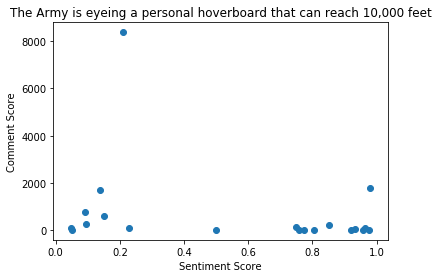

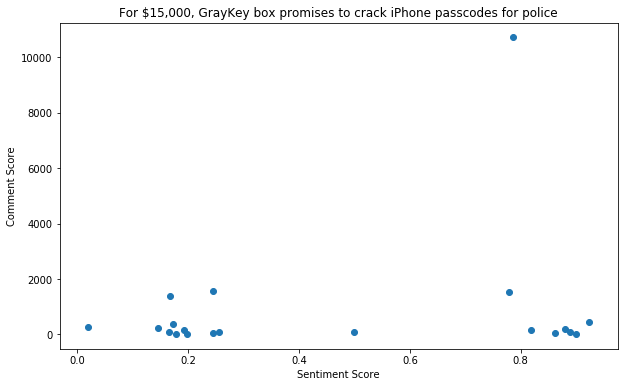

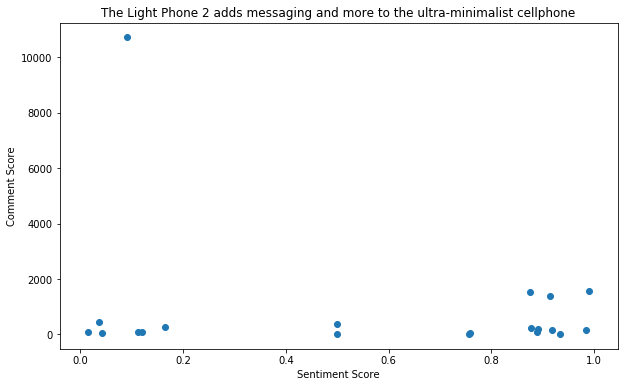

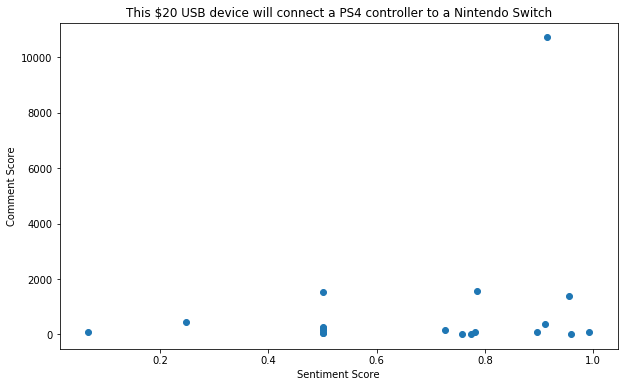

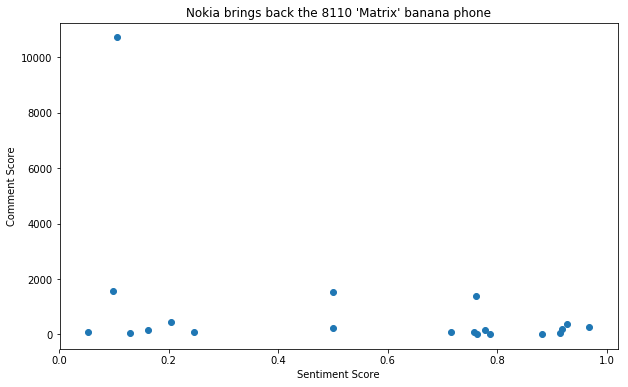

In [19]:
import matplotlib.pylab as plt

#lets separate the topics into individual dataframes for plotting
listTopics = []

#get the unique titles of the dataset
listTopics= pd_data.Title.unique()

# put each topic into its own dataframe
dfTopic0 = pd_data[pd_data['Title'] == listTopics[0]]
dfTopic1 = pd_data[pd_data['Title'] == listTopics[1]]
dfTopic2 = pd_data[pd_data['Title'] == listTopics[2]]
dfTopic3 = pd_data[pd_data['Title'] == listTopics[3]]
dfTopic4 = pd_data[pd_data['Title'] == listTopics[4]]


#set the axis labels, same for all plots
plt.ylabel('Comment Score')
plt.xlabel('Sentiment Score')
plt.rcParams['figure.figsize'] = (10,6)

#Graph Title
plt.title(dfTopic0.iloc[0].Title)
#pouplate Graph
plt.scatter(dfTopic0.sentiment_score, dfTopic0.Comments_Score);

#show graph
plt.show()


#other titles
plt.title(dfTopic1.iloc[0].Title)
plt.scatter(dfTopic1.sentiment_score, dfTopic1.Comments_Score);
plt.ylabel('Comment Score')
plt.xlabel('Sentiment Score')
plt.show()

plt.title(dfTopic2.iloc[0].Title)
plt.scatter(dfTopic2.sentiment_score, dfTopic1.Comments_Score);
plt.ylabel('Comment Score')
plt.xlabel('Sentiment Score')
plt.show()

plt.title(dfTopic3.iloc[0].Title)
plt.scatter(dfTopic3.sentiment_score, dfTopic1.Comments_Score);
plt.ylabel('Comment Score')
plt.xlabel('Sentiment Score')
plt.show()

plt.title(dfTopic4.iloc[0].Title)
plt.scatter(dfTopic4.sentiment_score, dfTopic1.Comments_Score);
plt.ylabel('Comment Score')
plt.xlabel('Sentiment Score')
plt.show()


#### What’s I notice about these graphs is how similar they are to each other.   I think this may be due to the need for additional data cleansing of the comments that needs to be done.  Many contain emoji or slang or other articles that the sentiment scoring system may not understand.  I also see a few 0.5 scores which I find to be suspicious, I would investigate those further.

####  Let's calculate the weighted average of the sentiment score for more information.

In [27]:
#print the topic
print ('Topic #1: ' + dfTopic0.iloc[0].Title)
#calculate weighted average for sentiment score
print ('Weighted Average Sentiment Score: ' + str((dfTopic0.sentiment_score * dfTopic0.Comments_Score).sum() / dfTopic0.Comments_Score.sum()))

print (' ')

print ('Topic #2: ' + dfTopic1.iloc[0].Title)
print ('Weighted Average Sentiment Score: ' + str((dfTopic1.sentiment_score * dfTopic1.Comments_Score).sum() / dfTopic1.Comments_Score.sum()))

print (' ')

print ('Topic #3: ' + dfTopic2.iloc[0].Title)
print ('Weighted Average Sentiment Score: ' + str((dfTopic2.sentiment_score * dfTopic2.Comments_Score).sum() / dfTopic2.Comments_Score.sum()))

print (' ')

print ('Topic #4: ' + dfTopic3.iloc[0].Title)
print ('Weighted Average Sentiment Score: ' + str((dfTopic3.sentiment_score * dfTopic3.Comments_Score).sum() / dfTopic3.Comments_Score.sum()))

print (' ')

print ('Topic #5: ' + dfTopic4.iloc[0].Title)
print ('Weighted Average Sentiment Score: ' + str((dfTopic4.sentiment_score * dfTopic4.Comments_Score).sum() / dfTopic4.Comments_Score.sum()))


Topic #1: The Army is eyeing a personal hoverboard that can reach 10,000 feet
Weighted Average Sentiment Score: 0.315103308208
 
Topic #2: For $15,000, GrayKey box promises to crack iPhone passcodes for police
Weighted Average Sentiment Score: 0.645349232899
 
Topic #3: The Light Phone 2 adds messaging and more to the ultra-minimalist cellphone
Weighted Average Sentiment Score: 0.516243929501
 
Topic #4: This $20 USB device will connect a PS4 controller to a Nintendo Switch
Weighted Average Sentiment Score: 0.862224426292
 
Topic #5: Nokia brings back the 8110 'Matrix' banana phone
Weighted Average Sentiment Score: 0.271465464614


#### With this data, I believe we can say that the reactions to topic 2 and topic 4 (very) are positive, topics 1 & 5 are negative and topic 3 is fairly neutral.  This is based on the 0-1 sentiment scale from Azure.  Now that we have this data, we could use it to make business decisions.  

#### Example: If we had a product we were curious in feedback on, we could submit it here and see what the sentiment feedback was.

<b>Summary:</b>  I connected a python application to reddit using the PRAW API wrapper.   I demonstrated some simple PRAW commands and connected to a single subreddit ‘gadgets’.  Using the top 5 most popular submission by month, I collected submission titles, comments and comment scores.  I put that data into a dataframe and processed it.  I showed how setup an Azure text analytics application and then ran the processed comment data through a sentiment API within Azure.  I used the sentiment data to analyze the popularity or unpopularity of a product using based on the sentiment of the comment and the score of that comment.   I used scatter plots to show the data and weighted averages to make informed business decisions.

References:
    
  * Reddit: http://www.reddit.com
  * PRAW https://praw.readthedocs.io/en/latest/
  * Azure Cognitive Services: https://azure.microsoft.com/en-us/services/cognitive-services/text-analytics/
  * Azure Senitment Analysis: https://docs.microsoft.com/en-us/azure/cognitive-services/text-analytics/overview
    